In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [48]:
import kagglehub

path = kagglehub.dataset_download("hemil26/crime-in-los-angeles")

print("Path to dataset files:", path)

Path to dataset files: /Users/hientran/.cache/kagglehub/datasets/hemil26/crime-in-los-angeles/versions/8


In [49]:
import os
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/hientran/.cache/kagglehub/datasets/hemil26/crime-in-los-angeles/versions/8/crime_in_la.csv
/Users/hientran/.cache/kagglehub/datasets/hemil26/crime-in-los-angeles/versions/8/MO_CODES_Numerical_20191119.pdf
/Users/hientran/.cache/kagglehub/datasets/hemil26/crime-in-los-angeles/versions/8/UCR-COMPSTAT062618.pdf
/Users/hientran/.cache/kagglehub/datasets/hemil26/crime-in-los-angeles/versions/8/UCR_Manual.pdf


In [50]:
df = pd.read_csv('/Users/hientran/.cache/kagglehub/datasets/hemil26/crime-in-los-angeles/versions/8/crime_in_la.csv')

In [51]:
# Shape : (rows, columns)
print(f"Dataset shape: {df.shape}")

# Display all column names
print("\nFeature Names:")
print(df.columns.tolist())

Dataset shape: (963006, 20)

Feature Names:
['DR_NO', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME', 'Rpt Dist No', 'Crm Cd', 'Crm Cd Desc', 'Mocodes', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'LOCATION', 'LAT', 'LON']


In [52]:
df.head()

,DR_NO,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,LAT,LON
0,190326475,01/03/2020,21:30,7,Wilshire,784,510,VEHICLE - STOLEN,0,0,M,O,STREET,500.0,UNKNOWN WEAPON/OTHER WEAPON,AA,Adult Arrest,1900 S LONGWOOD AV,34.0375,-118.3506
1,200106753,08/02/2020,18:00,1,Central,182,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,BUS STOP/LAYOVER (ALSO QUERY 124),500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,1000 S FLOWER ST,34.0444,-118.2628
2,200320258,04/11/2020,17:00,3,Southwest,356,480,BIKE - STOLEN,0344 1251,19,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,1400 W 37TH ST,34.0210,-118.3002
3,200907217,10/03/2020,20:37,9,Van Nuys,964,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,CLOTHING STORE,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,14000 RIVERSIDE DR,34.1576,-118.4387
4,220614831,17/08/2020,12:00,6,Hollywood,666,354,THEFT OF IDENTITY,1822 1501 0930 2004,28,M,H,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,1900 TRANSIENT,34.0944,-118.3277


In [53]:
df.columns = df.columns.str.replace(" ", "_")

df.columns

Index(['DR_NO', 'DATE_OCC', 'TIME_OCC', 'AREA', 'AREA_NAME', 'Rpt_Dist_No',
       'Crm_Cd', 'Crm_Cd_Desc', 'Mocodes', 'Vict_Age', 'Vict_Sex',
       'Vict_Descent', 'Premis_Desc', 'Weapon_Used_Cd', 'Weapon_Desc',
       'Status', 'Status_Desc', 'LOCATION', 'LAT', 'LON'],
      dtype='object')

In [54]:
df.dtypes

DR_NO               int64
DATE_OCC           object
TIME_OCC           object
AREA                int64
AREA_NAME          object
Rpt_Dist_No         int64
Crm_Cd              int64
Crm_Cd_Desc        object
Mocodes            object
Vict_Age            int64
Vict_Sex           object
Vict_Descent       object
Premis_Desc        object
Weapon_Used_Cd    float64
Weapon_Desc        object
Status             object
Status_Desc        object
LOCATION           object
LAT               float64
LON               float64
dtype: object

In [55]:
print("\nMissing Values Count:")
print(df.isnull().sum())


Missing Values Count:
DR_NO               0
DATE_OCC            0
TIME_OCC            0
AREA                0
AREA_NAME           0
Rpt_Dist_No         0
Crm_Cd              0
Crm_Cd_Desc         0
Mocodes             0
Vict_Age            0
Vict_Sex            0
Vict_Descent        0
Premis_Desc       575
Weapon_Used_Cd      0
Weapon_Desc         0
Status              1
Status_Desc         0
LOCATION            0
LAT                 0
LON                 0
dtype: int64


In [56]:
df['Premis_Desc'].fillna('Unknown', inplace=True)
df.dropna(subset=["Status"], inplace=True)
print(df.isnull().sum())

/var/folders/ly/4knwk5td4wx38msck62s68_40000gn/T/ipykernel_185/1335711421.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Premis_Desc'].fillna('Unknown', inplace=True)


DR_NO             0
DATE_OCC          0
TIME_OCC          0
AREA              0
AREA_NAME         0
Rpt_Dist_No       0
Crm_Cd            0
Crm_Cd_Desc       0
Mocodes           0
Vict_Age          0
Vict_Sex          0
Vict_Descent      0
Premis_Desc       0
Weapon_Used_Cd    0
Weapon_Desc       0
Status            0
Status_Desc       0
LOCATION          0
LAT               0
LON               0
dtype: int64


In [57]:
df.describe()

,DR_NO,AREA,Rpt_Dist_No,Crm_Cd,Vict_Age,Weapon_Used_Cd,LAT,LON
count,9.630050e+05,963005.000000,963005.000000,963005.000000,963005.000000,963005.000000,963005.000000,963005.000000
mean,2.193097e+08,10.712629,1117.701281,500.660485,29.296939,453.974802,33.994096,-118.076735
std,1.271525e+07,6.102609,610.331846,206.634436,21.926332,96.518357,1.653218,5.730325
min,8.170000e+02,1.000000,101.000000,110.000000,-4.000000,101.000000,0.000000,-118.667600
25%,2.105155e+08,6.000000,615.000000,331.000000,0.000000,400.000000,34.014600,-118.430700
50%,2.207157e+08,11.000000,1141.000000,442.000000,30.000000,500.000000,34.058900,-118.322500
75%,2.308096e+08,16.000000,1617.000000,626.000000,45.000000,500.000000,34.164900,-118.273900
max,2.499187e+08,21.000000,2199.000000,956.000000,120.000000,516.000000,34.334300,0.000000


In [58]:
df["Vict_Age"].value_counts().head()

Vict_Age
0     249501
30     21596
35     21127
31     20723
29     20634
Name: count, dtype: int64

In [59]:
df[df['Vict_Age'] < 0].head()

,DR_NO,DATE_OCC,TIME_OCC,AREA,AREA_NAME,Rpt_Dist_No,Crm_Cd,Crm_Cd_Desc,Mocodes,Vict_Age,Vict_Sex,Vict_Descent,Premis_Desc,Weapon_Used_Cd,Weapon_Desc,Status,Status_Desc,LOCATION,LAT,LON
143,231806653,04/03/2020,08:00,18,Southeast,1832,946,OTHER MISCELLANEOUS CRIME,0913 0935,-2,X,X,POLICE FACILITY,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,100 W 108TH ST,33.9401,-118.2761
374,231412171,01/06/2020,12:00,14,Pacific,1435,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,0443,-2,M,W,SINGLE FAMILY DWELLING,511.0,VERBAL THREAT,IC,Invest Cont,3500 GRAND VIEW BL,34.0118,-118.4365
582,222106102,13/12/2020,14:30,21,Topanga,2156,354,THEFT OF IDENTITY,1822 0377,-1,M,W,STREET,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,6600 TOPANGA CANYON BL,34.1904,-118.6059
596,221404829,16/07/2020,03:00,14,Pacific,1487,310,BURGLARY,0344,-1,X,X,OTHER BUSINESS,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,8600 S SEPULVEDA BL,33.9598,-118.3962
619,221810106,18/11/2020,00:01,18,Southeast,1841,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1822 1501 2021,-1,X,X,POLICE FACILITY,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,11200 SOUTHWEST BL,33.9334,-118.2886


In [60]:
df['Vict_Age'] = df['Vict_Age'].apply(lambda x: 0 if x <= 0 else x)

In [61]:
df["LOCATION"].value_counts().head()

LOCATION
800 N  ALAMEDA                      ST      2133
6TH                          ST             1563
10200    SANTA MONICA                 BL    1558
700 S  FIGUEROA                     ST      1533
100    THE GROVE                    DR      1520
Name: count, dtype: int64

In [62]:
age_ranges = [0, 17, 25, 34, 44, 54, 64, float('inf')]

age_labels = ['<18', '18-25', '26-34', '35-44', '45-54', '55-64', '65+']

df["Vict_Age_Group"] = pd.cut(df["Vict_Age"], bins = age_ranges, labels = age_labels)

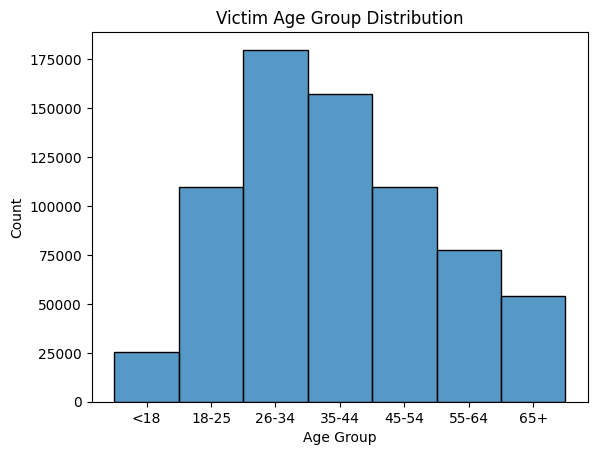

In [63]:
sns.histplot(data=df, x='Vict_Age_Group', discrete=True)
plt.title('Victim Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

IndexError: index 2 is out of bounds for axis 0 with size 2

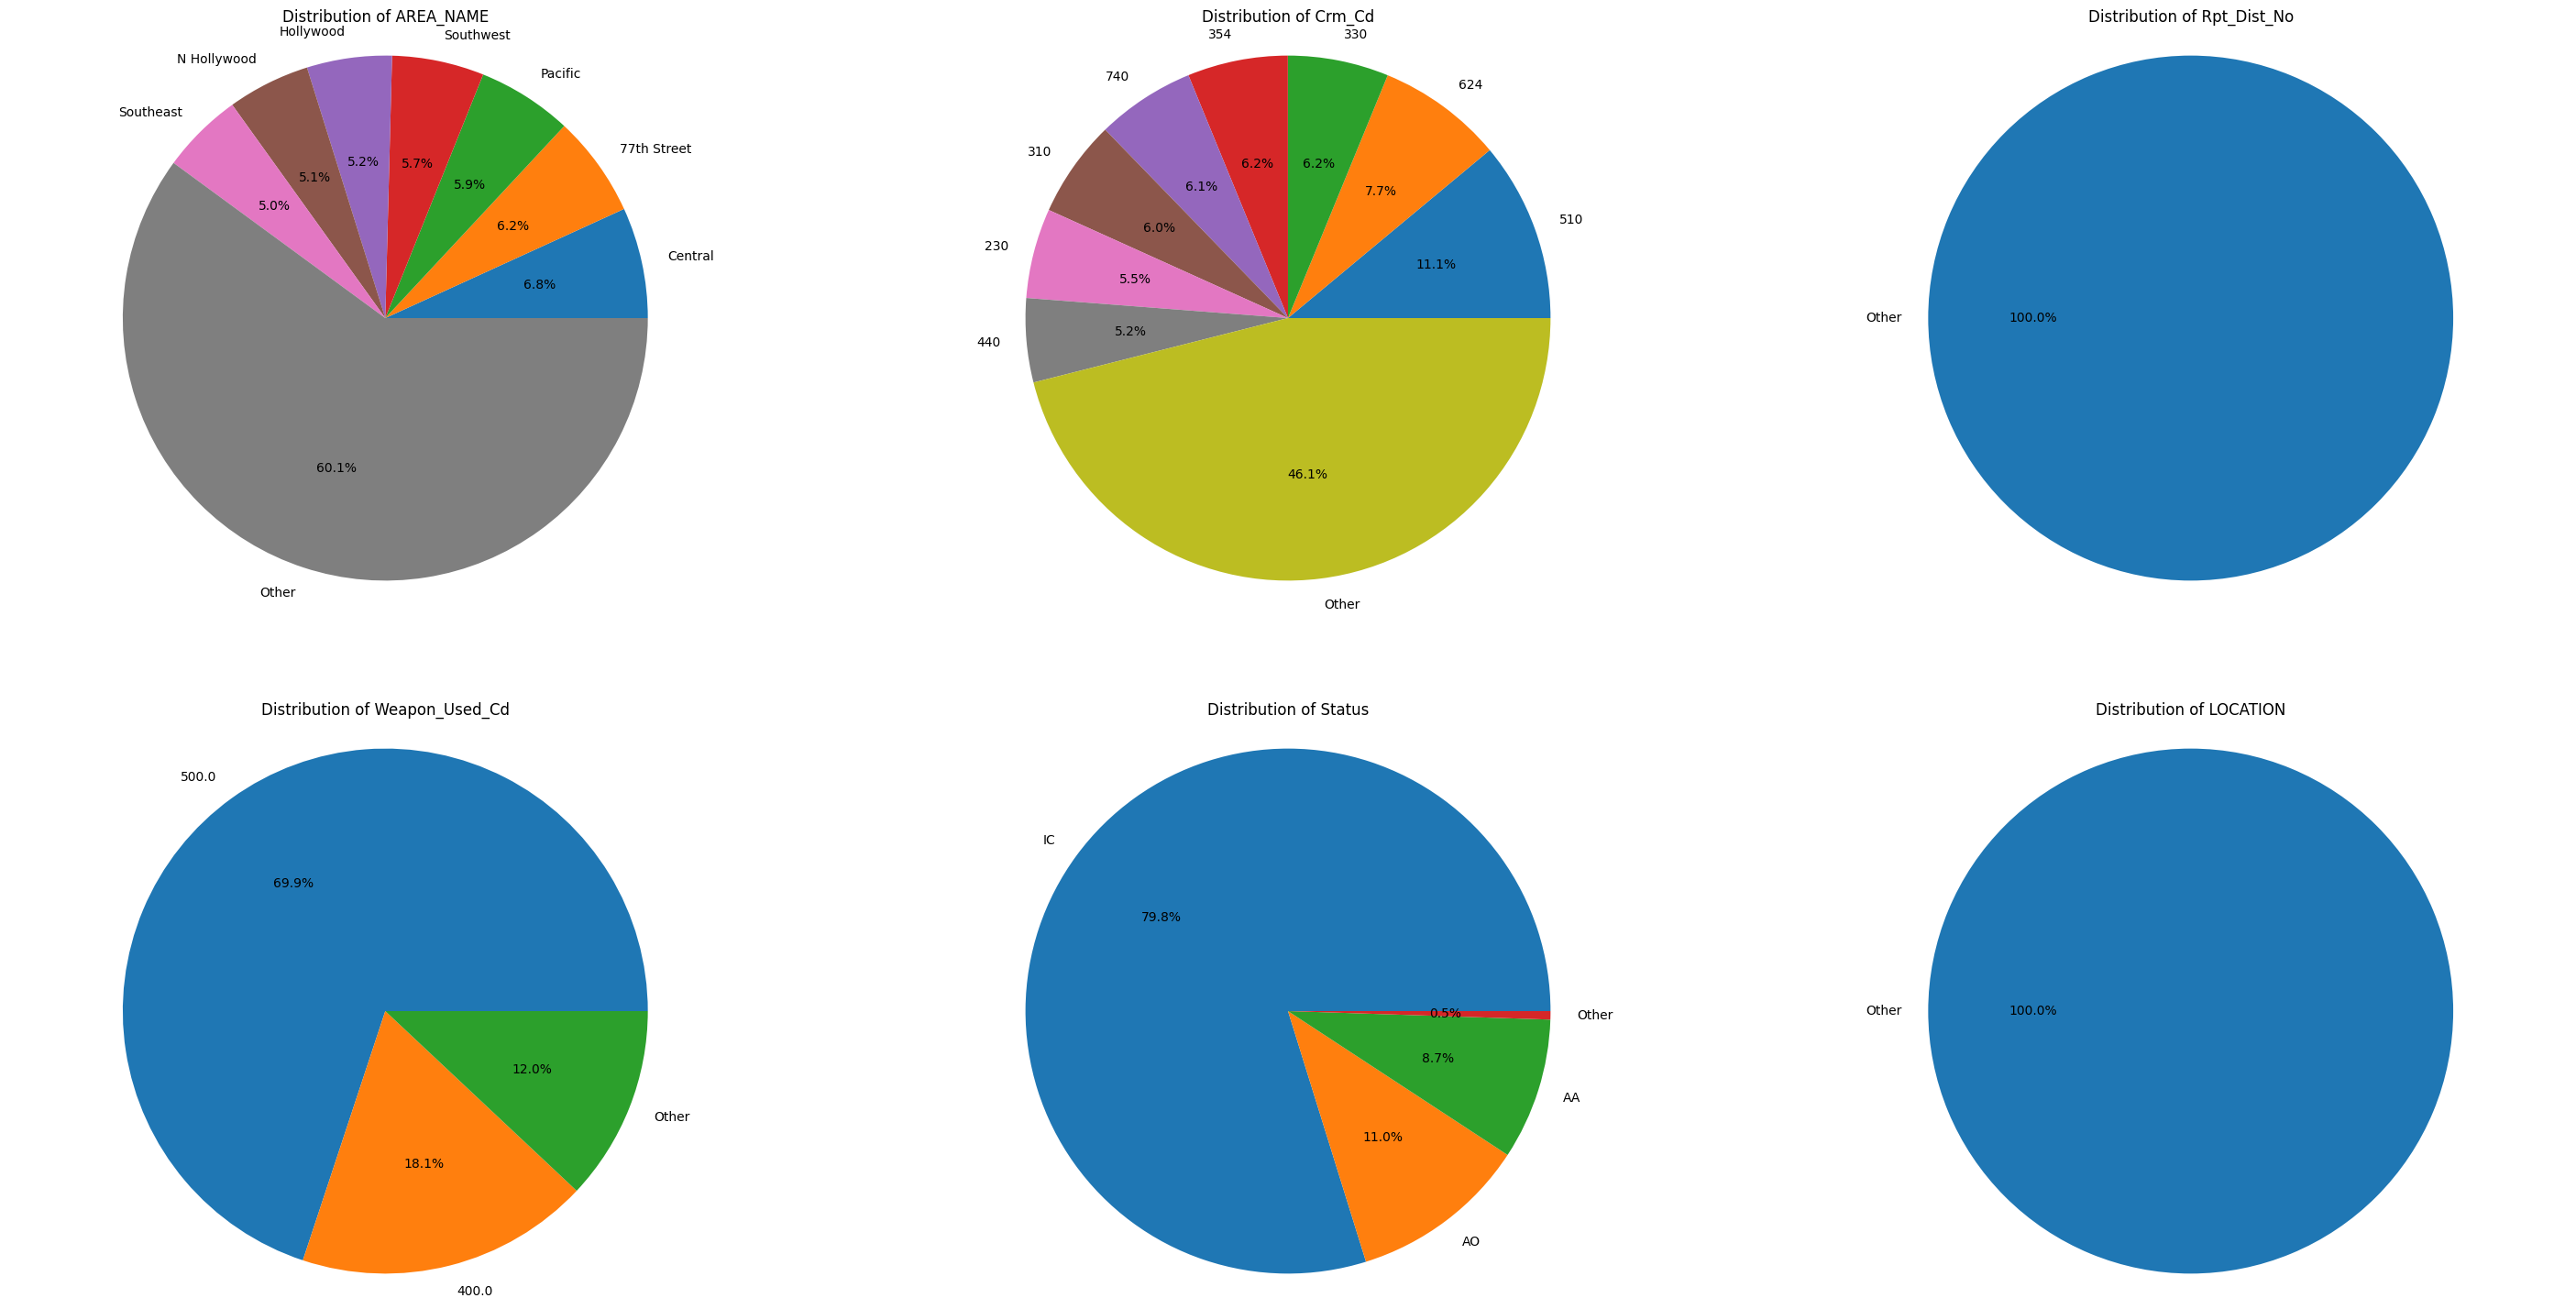

In [86]:
num_features = ['AREA_NAME', 'Crm_Cd', 'Rpt_Dist_No', 'Weapon_Used_Cd', 'Status', 'LOCATION', 'Vict_Descent']

fig, ax = plt.subplots(2, 3, figsize=(36, 18))

for i, feature in enumerate(num_features):
    row, col = divmod(i, 3)

    feature_counts = df[feature].value_counts()

    threshold = 0.05
    feature_counts_filtered = feature_counts[feature_counts / feature_counts.sum() > threshold]
    other_count = feature_counts[feature_counts / feature_counts.sum() <= threshold].sum()

    feature_counts_filtered['Other'] = other_count

    ax[row, col].pie(feature_counts_filtered, labels= feature_counts_filtered.index, autopct='%1.1f%%')
    ax[row, col].set_title(f'Distribution of {feature}')
    ax[row, col].axis('equal')

plt.tight_layout()
plt.show()

In [78]:
def get_hour(col_name):
    hour = int(col_name[:2])
    return hour

df['Crime_Hour'] = df['TIME_OCC'].apply(get_hour)

time_range = [0, 6, 12, 18, 24]
time_labels = ['0-6 AM', '6-12 PM', '12-6 PM', '6-12 AM']

df['Time_Group'] = pd.cut(df['Crime_Hour'], bins = time_range, labels=time_labels, right=False)

print(df[['TIME_OCC', 'Time_Group']].head())

  TIME_OCC Time_Group
0    21:30    6-12 AM
1    18:00    6-12 AM
2    17:00    12-6 PM
3    20:37    6-12 AM
4    12:00    12-6 PM


In [81]:
location_time_group = df.groupby(['LOCATION', 'Time_Group']).size().reset_index(name='Crime_Count_Location_Hour')

print(location_time_group.head())

/var/folders/ly/4knwk5td4wx38msck62s68_40000gn/T/ipykernel_185/2155123795.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  location_time_group = df.groupby(['LOCATION', 'Time_Group']).size().reset_index(name='Crime_Count_Location_Hour')


                                LOCATION Time_Group  Crime_Count_Location_Hour
0                             00    17TH     0-6 AM                          0
1                             00    17TH    6-12 PM                          0
2                             00    17TH    12-6 PM                          1
3                             00    17TH    6-12 AM                          0
4  00    17TH                         AV     0-6 AM                          2


/var/folders/ly/4knwk5td4wx38msck62s68_40000gn/T/ipykernel_185/1505340315.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_data = location_time_group.pivot_table(index='LOCATION', columns='Time_Group', values='Crime_Count_Location_Hour', aggfunc='sum')


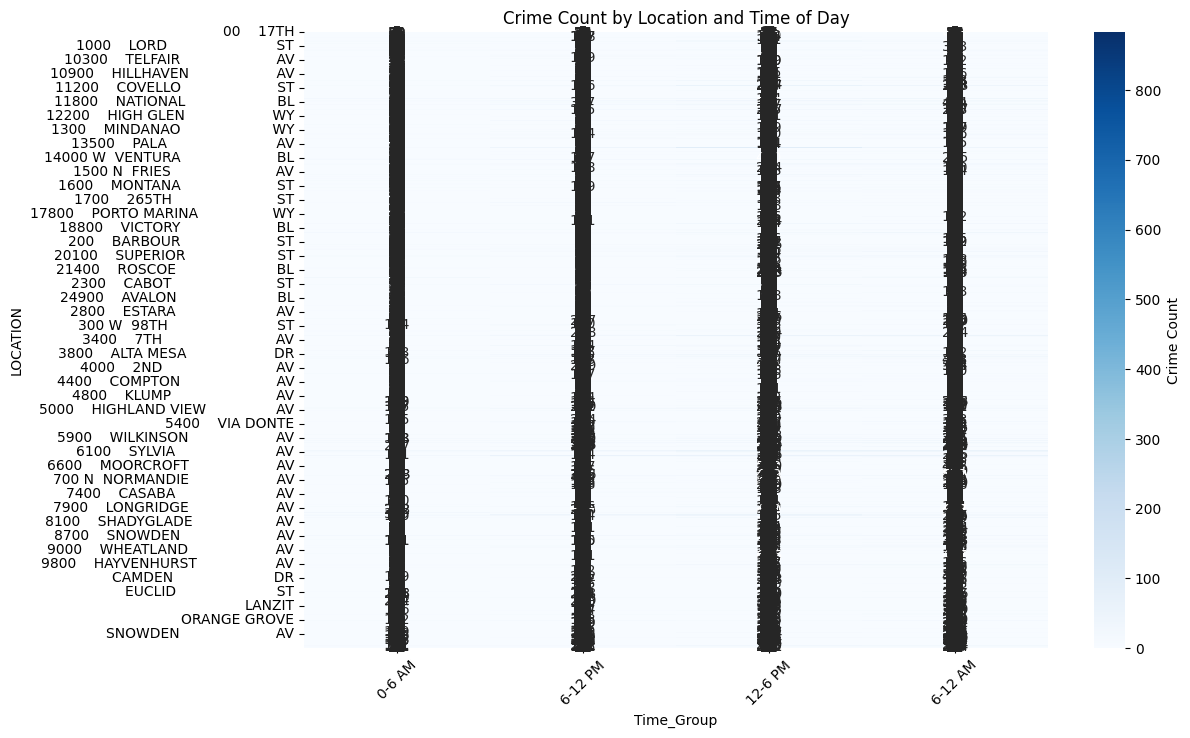

In [82]:
pivot_data = location_time_group.pivot_table(index='LOCATION', columns='Time_Group', values='Crime_Count_Location_Hour', aggfunc='sum')


plt.figure(figsize=(12, 8)) 
sns.heatmap(pivot_data, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Crime Count'})
plt.title('Crime Count by Location and Time of Day')
plt.xticks(rotation=45) 
plt.yticks(rotation=0)
plt.show()